# Analyzing Exchange Rate of Euro to National Currencies

In this project I will be reading in a dataset containing information on how the EURO has fluctuated over the last 20 years. After some quick data alterations, we will be analyzing the EURO's relationship with the USD over the last three presidents. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
exchange_rates = pd.read_csv('euro-daily-hist_1999_2020.csv')

This file is a dataset for the exchange rate from euros to currencies around the world. 

In [4]:
print(exchange_rates.head())
print(exchange_rates.tail())

  Period\Unit: [Australian dollar ] [Bulgarian lev ] [Brazilian real ]  \
0   2021-01-08               1.5758           1.9558            6.5748   
1   2021-01-07               1.5836           1.9558            6.5172   
2   2021-01-06               1.5824           1.9558            6.5119   
3   2021-01-05               1.5927           1.9558            6.5517   
4   2021-01-04               1.5928           1.9558            6.3241   

  [Canadian dollar ] [Swiss franc ] [Chinese yuan renminbi ] [Cypriot pound ]  \
0             1.5543         1.0827                   7.9184              NaN   
1             1.5601         1.0833                   7.9392              NaN   
2             1.5640         1.0821                   7.9653              NaN   
3             1.5651         1.0803                   7.9315              NaN   
4             1.5621         1.0811                   7.9484              NaN   

  [Czech koruna ] [Danish krone ]  ... [Romanian leu ] [Russian roub

In [5]:
exchange_rates.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5699 entries, 0 to 5698
Data columns (total 41 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Period\Unit:              5699 non-null   object 
 1   [Australian dollar ]      5699 non-null   object 
 2   [Bulgarian lev ]          5297 non-null   object 
 3   [Brazilian real ]         5431 non-null   object 
 4   [Canadian dollar ]        5699 non-null   object 
 5   [Swiss franc ]            5699 non-null   object 
 6   [Chinese yuan renminbi ]  5431 non-null   object 
 7   [Cypriot pound ]          2346 non-null   object 
 8   [Czech koruna ]           5699 non-null   object 
 9   [Danish krone ]           5699 non-null   object 
 10  [Estonian kroon ]         3130 non-null   object 
 11  [UK pound sterling ]      5699 non-null   object 
 12  [Greek drachma ]          520 non-null    object 
 13  [Hong Kong dollar ]       5699 non-null   object 
 14  [Croatia

This .info() output displays how some of the currencies don't have values for the whole 5699 rows available. This could be a result of a decreased usage of the currency, or unavailability of data.

# Data Cleaning

In [6]:
exchange_rates.rename(columns={'[US dollar ]': 'US_dollar',
                               'Period\\Unit:': 'Time'},
                      inplace=True) 
# Changes column names to US_dollar and Time
exchange_rates['Time'] = pd.to_datetime(exchange_rates['Time'])
# Changes the values in the Time column to datetime
exchange_rates.sort_values('Time', inplace = True) 
# Sorts values from exchange rates in the 'Time' column
exchange_rates.reset_index(drop = True, inplace = True)

In [7]:
euro_to_dollar = exchange_rates[['Time','US_dollar']]

In [8]:
euro_to_dollar['US_dollar'].value_counts()

-         62
1.2276     9
1.1215     8
1.1305     7
1.1193     6
          ..
1.0738     1
1.4663     1
1.2192     1
1.2991     1
0.9413     1
Name: US_dollar, Length: 3528, dtype: int64

There are 62 counts of rows with - as a value, we need to rid the dataset of those. 

In [9]:
euro_to_dollar = euro_to_dollar[euro_to_dollar['US_dollar'] != '-']

In [10]:
euro_to_dollar['US_dollar'] = euro_to_dollar['US_dollar'].astype(float)

# Using a Rolling Mean

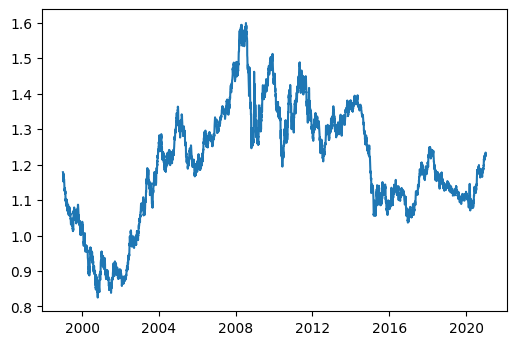

In [11]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['US_dollar'])
plt.show()

Although this graph is informative, the jagged lines give a bit too much detail that is inconsequential. We can smoothen this out with a rolling mean

In [12]:
euro_to_dollar['rolling_mean'] = euro_to_dollar['US_dollar'].rolling(30).mean()

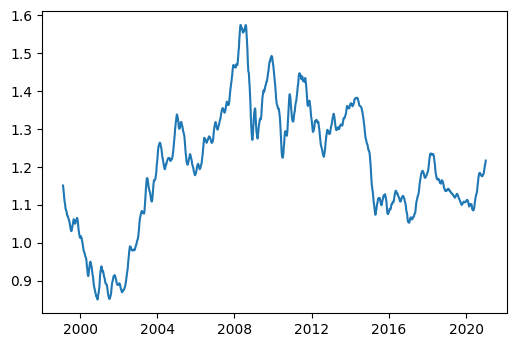

In [13]:
plt.plot(euro_to_dollar['Time'],
         euro_to_dollar['rolling_mean'])
plt.show()

This is a bit smoother and easier to read!

# Comparisons from Past to Present

I'd like to compare how the euro to dollar rate has changed over the last three presidencies, excluding Biden. So we'll be analyzing Bush, Obama and Trump's presidential years. 

In [14]:
all_three = euro_to_dollar.copy(
)[(euro_to_dollar['Time'].dt.year >= 2001) & (euro_to_dollar['Time'].dt.year < 2021)]

bush = all_three.copy(
)[(all_three['Time'].dt.year >= 2001) & (all_three['Time'].dt.year < 2009)]
obama = all_three.copy(
)[(all_three['Time'].dt.year >= 2009) & (all_three['Time'].dt.year < 2017)]
trump = all_three.copy(
)[(all_three['Time'].dt.year >= 2017) & (all_three['Time'].dt.year < 2021)]

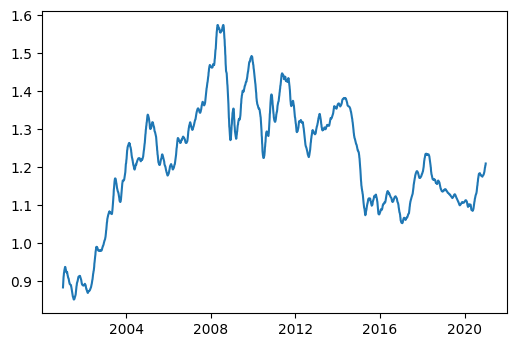

In [16]:
plt.plot(all_three['Time'], all_three['rolling_mean'])
plt.show()

So we're going to take this simple visual, break it down into three segments, and analyze the patterns of EURO-USD rate between each president. 

In [17]:
print("Average Rate from 2001-2021: ", all_three['rolling_mean'].mean())
print("\n")
print("Bush's rate: ", bush['rolling_mean'].mean())
print("Obama's rate: ", obama['rolling_mean'].mean())
print("Trumps's rate: ", trump['rolling_mean'].mean())

Average Rate from 2001-2021:  1.219297472971214


Bush's rate:  1.1918088041707402
Obama's rate:  1.285902014634148
Trumps's rate:  1.1407284964122657


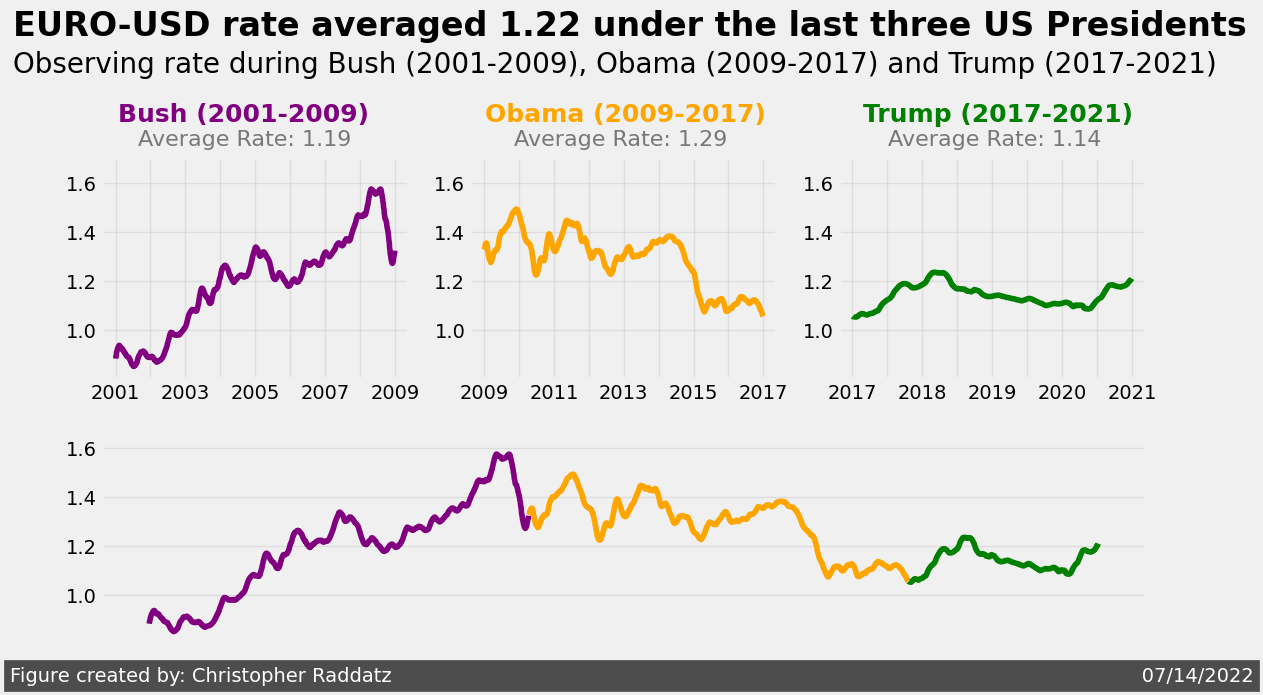

In [28]:
import matplotlib.style as style #I admire 538's style so I'll use their designs.
style.use('fivethirtyeight')

plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
axes = [ax1, ax2, ax3, ax4]

for ax in axes:
    ax.set_ylim(0.8, 1.7)
    ax.set_yticks([1.0, 1.2, 1.4, 1.6])
    ax.set_yticklabels(['1.0', '1.2', '1.4', '1.6'])
    ax.grid(alpha = 0.5)

ax1.plot(bush['Time'], bush['rolling_mean'], color = 'purple')
ax1.set_xticklabels(['','2001', '', '2003', '', '2005', '', '2007', '', '2009'])
ax1.text(730516.0, 1.85, 'Bush (2001-2009)', fontsize = 18, color = 'purple',
        weight = 'bold')
ax1.text(730716.0, 1.75, 'Average Rate: 1.19', alpha = 0.5, fontsize = 16)

ax2.plot(obama['Time'], obama['rolling_mean'], color = 'orange')
ax2.set_xticklabels(["", '2009', "", '2011', "", '2013', "", '2015', "", '2017'])
ax2.text(733416.0, 1.85, 'Obama (2009-2017)', fontsize = 18,
        color = 'orange', weight = 'bold')
ax2.text(733716.0, 1.75, 'Average Rate: 1.29', alpha = 0.5, fontsize = 16)

ax3.plot(trump['Time'], trump['rolling_mean'], color = 'green')
ax3.set_xticklabels(['2017', '', "2018",'', "2019", '', "2020", '',"2021"])
ax3.text(736386.0, 1.85, 'Trump (2017-2021)', fontsize = 18, 
        color = 'green', weight = 'bold')
ax3.text(736516.0, 1.75, 'Average Rate: 1.14', alpha = 0.5, fontsize = 16)

ax1.text(729416.0, 2.20, 'EURO-USD rate averaged 1.22 under the last three US Presidents', fontsize = 24, weight = 'bold')
ax1.text(729416.0, 2.05, 'Observing rate during Bush (2001-2009), Obama (2009-2017) and Trump (2017-2021)', fontsize = 20)

ax4.plot(bush['Time'], bush['rolling_mean'], color = 'purple')
ax4.plot(obama['Time'], obama['rolling_mean'], color = 'orange')
ax4.plot(trump['Time'], trump['rolling_mean'], color = 'green')
ax4.set_xticklabels([])
ax4.set_xticks([])
ax4.text(729416.0, 0.65, 'Figure created by: Christopher Raddatz' + ' '*120 + '07/14/2022', 
        backgroundcolor = '#4d4d4d', size = 14, color = 'white')
plt.show()

# Conclusion

I think the figure explains the general conclusion of this project. I'd like to this use this type of figure presentation for other data analysis projects of mine. 